## Bibliotecas

In [1]:
import pandas as pd                                     # Tratamiento de datos

from sklearn.model_selection import StratifiedKFold     # Clases desequelibradas
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
import statistics                                       # Estadisticas

import seaborn as sns                                   # Graficos de combinaciones
import matplotlib.pyplot as plt                         # Graficos de 2 dimensiones


## Lectura de dataset

In [2]:
dataset = pd.read_csv('../datasets_creados/data_kmeans.csv')
dataset.head()

,Nombre,Puntuación,Dificultad,Categoria numerica,Categoria
0,,0.0,10.0,2,Malo
1,Aunque Me Borren Seguiré *A Todos Los Pseudoal...,3.8,5.8,0,Regular
2,Fanny Adan Sosa,8.5,1.9,3,Excelente
3,Rafael Aguilar García,7.7,2.4,1,Bueno
4,Fernando Aguilar Sanchez,8.4,1.9,3,Excelente


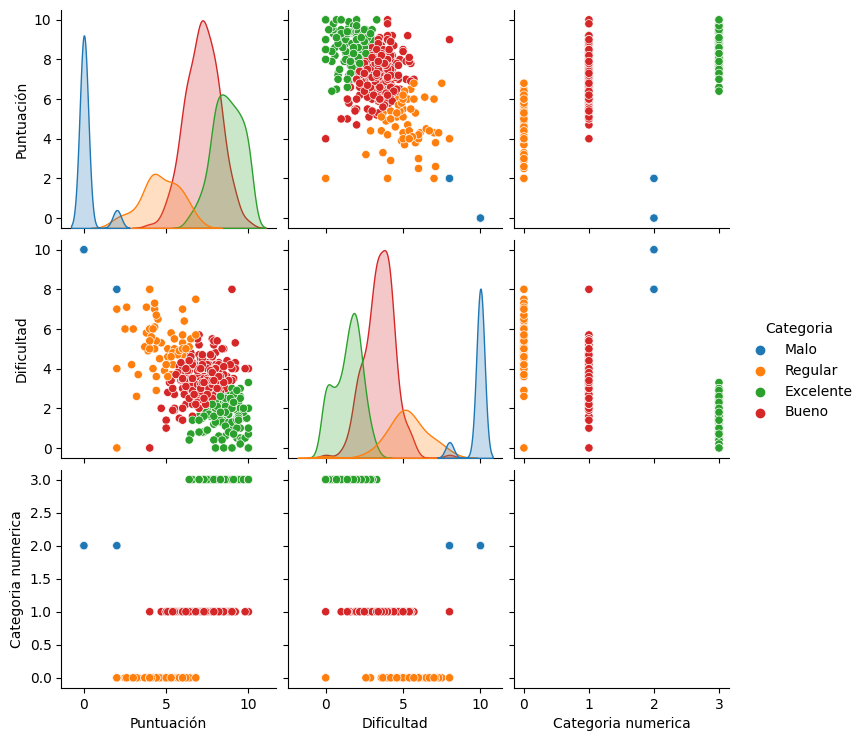

In [3]:
sns.pairplot(dataset, hue='Categoria')


## Dividir rasgos y clases

In [5]:
x = dataset.iloc[:, [1,2]].values
y = dataset.iloc[:, 3].values

## Preprocesamiento

## Modelo machine learning

In [6]:
from sklearn.naive_bayes import GaussianNB

## Validación cruzada

In [7]:
# --> Listas de métricas
lista_exactitud = []
lista_precision = []
lista_f1score = []
lista_sensibilidad = []


In [8]:
# --> Objeto para validacion
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# --> Iteraciones
for entrenamiento, prueba in skf.split(x, y):
    # --> Separar datos en entrenamiento y prueba
    x_entrenamiento, x_prueba = x[entrenamiento], x[prueba]
    y_entrenamiento, y_prueba = y[entrenamiento], y[prueba]

    # --> Clasificador de bayes
    y_predicha = GaussianNB().fit(x_entrenamiento, y_entrenamiento).predict(x_prueba)

    # --> Metricas
    lista_exactitud.append(accuracy_score(y_prueba, y_predicha))
    lista_precision.append(precision_score(y_prueba, y_predicha, average="macro"))
    lista_f1score.append(f1_score(y_prueba, y_predicha, average="macro"))
    lista_sensibilidad.append(recall_score(y_prueba, y_predicha, average="macro"))

In [9]:
print(f"""
[+]Exactitud:\t {round(100*(statistics.mean(lista_exactitud)), 2)} %
[+]Presicion:\t {round(100*(statistics.mean(lista_precision)), 2)} %
[+]F1-score:\t {round(100*(statistics.mean(lista_f1score)), 2)} %
[+]Sensibilidad: {round(100*(statistics.mean(lista_sensibilidad)), 2)} %
""")



[+]Exactitud:	 94.29 %
[+]Presicion:	 95.2 %
[+]F1-score:	 93.08 %
[+]Sensibilidad: 91.7 %

